In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import keras
from keras.layers import Activation, Dense, Conv1D, Flatten
from keras.models import Sequential
from keras import initializers
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models
from keras import optimizers
import tensorflow as tf

Using TensorFlow backend.


In [0]:
def generate_random_nn_data (hidden_dims, noise_proportion, n):
    """Function to generate synthetic data through a neural network with random weights.
    # Arguments:
      hidden_dims: Dimensions of hidden fully-connected layers in random neural network
      noise_proportion: Determines the noise standard deviation relative to the total range of test_y: 
        noise_std = range of y * noise_proportion
      n: number of training (i.e. sample) points
    # Returns:
      synthetic data, separated into pool/test/sample points
    """
    #Creating neural network with random-normal distributed weights
    model = Sequential()
    model.add(Dense(hidden_dims[0], activation='tanh', input_shape=(1,), kernel_initializer=initializers.random_normal(stddev=0.5)
        , bias_initializer=initializers.random_normal(stddev=0.5)))
    for hidden_ind in range(1, len(hidden_dims)):
        model.add((Dense(hidden_dims[hidden_ind], activation='tanh', kernel_initializer=initializers.random_normal(stddev=0.5)
            , bias_initializer=initializers.random_normal(stddev=0.5))))
    model.add(Dense(1, kernel_initializer=initializers.random_normal(stddev=0.5), bias_initializer=initializers.random_normal(stddev=0.5)))
    #Creating test set spanning inputs in the range [-10, 10] 
    x_increment = 0.1
    test_x = np.arange(-10, 10+x_increment, x_increment)
    test_y = model.predict(test_x).flatten()
    #Creating pool set 
    pool_x = test_x + x_increment/2
    noise_std = (np.amax(test_y) - np.amin(test_y))*noise_proportion
    pool_y = model.predict(pool_x).flatten() + np.random.normal(0, noise_std, len(pool_x))
    sample_noise = np.random.normal(0, noise_std, n)
    #Creating training data with relatively high density in [-10, -2] and [2,10]
    #but few points in the interval [-2,2]
    all_intervals = [[-10.0,-2.0], [-2.0, 2.0], [2.0, 10.0]]
    sample_x = []
    sample_y = []
    for sample_ind in range(n):
        #Assigning each point to the three intervals defined above
        if sample_ind < n//2 - 1:
            interval = all_intervals[0]
        elif sample_ind < n-2:
            interval = all_intervals[2]
        else:
            interval = all_intervals[1]
        #Uniform choise of x value within each interval
        x_val = np.random.uniform(interval[0], interval[1], 1)
        #Adding noise-corrupted point to the training/sample set
        sample_x.append(x_val[0])
        sample_y.append((model.predict(x_val).flatten() + sample_noise[sample_ind])[0])
    return [np.array(pool_x), np.array(pool_y), np.array(test_x), np.array(test_y), np.array(sample_x), np.array(sample_y)]

Text(0.5, 1.0, 'Synthetic Training and Testing Data')

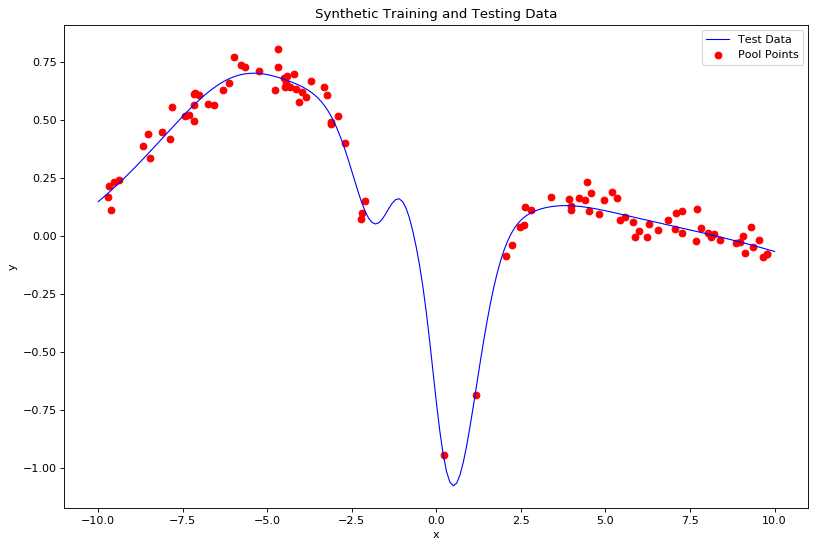

In [0]:
#Plotting training points and noise-free test data
pool_x, pool_y, test_x, test_y, sample_x, sample_y = generate_random_nn_data([32,32], 0.03, 100)
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(test_x, test_y, color='b', linewidth=1.0, label="Test Data")
plt.scatter(sample_x, sample_y, color='r', linewidth=1.0, label="Training Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 1)
plt.title("Synthetic Training and Testing Data")    

In [0]:
#Saving synthetic 1D data
dir_path = "/content/gdrive/My Drive/Active_Learning_Expected_Improvement_Maximization/1DEIVisualization/"

np.save(dir_path + "1D_Data/pool_x.npy", pool_x)
np.save(dir_path + "1D_Data/pool_y.npy", pool_y)
np.save(dir_path + "1D_Data/test_x.npy", test_x)
np.save(dir_path + "1D_Data/test_y.npy", test_y)
np.save(dir_path + "1D_Data/sample_x.npy", sample_x)
np.save(dir_path + "1D_Data/sample_y.npy", sample_y)